In [ ]:
#Load the dataframe

In [11]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [12]:
df.head()

,PersonID,Gender,Age,Occupation,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,BloodPressure,HeartRate,DailySteps,SleepDisorder,MentalHealth
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Medium
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low


In [ ]:
#Removing needles MentalHealth column

In [13]:
df = df.drop('MentalHealth', axis=1)

In [ ]:
#SleepDisorder NaN updating

In [14]:
df.fillna('None', inplace = True)

In [15]:
df.head()

,PersonID,Gender,Age,Occupation,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,BloodPressure,HeartRate,DailySteps,SleepDisorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#Checking if any missing values left

In [16]:
df.isnull().sum()

PersonID                 0
Gender                   0
Age                      0
Occupation               0
SleepDuration            0
QualityofSleep           0
PhysicalActivityLevel    0
StressLevel              0
BMICategory              0
BloodPressure            0
HeartRate                0
DailySteps               0
SleepDisorder            0
dtype: int64

In [ ]:
#Duplicates identiyfing

In [17]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
369    False
370    False
371    False
372    False
373    False
Length: 374, dtype: bool

In [ ]:
#Avg SleepDuration was presented on the histogram

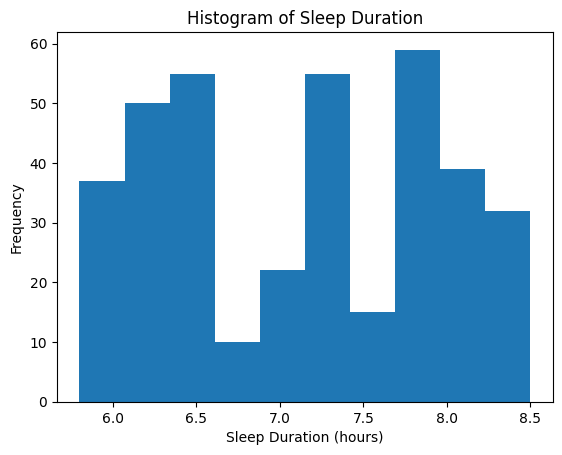

In [30]:
df['SleepDuration'].plot(kind='hist', bins=10, title='Histogram of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Average sleep duration was calculated for study group based on Occupation, Gender & Age

In [20]:
avgGender = round(df.groupby('Gender')['SleepDuration'].mean(),2)
df['AvgSleepDuration'] = df['Gender'].map(avgGender)
print(avgGender)

Gender
Female    7.23
Male      7.04
Name: SleepDuration, dtype: float64


In [58]:
avgOccupation = round(df.groupby('Occupation')['SleepDuration'].mean(),2)
df['AvgSleepDuration'] = df['Occupation'].map(avgOccupation)
print(avgOccupation)

Occupation
Accountant              7.11
Doctor                  6.97
Engineer                7.99
Lawyer                  7.41
Manager                 6.90
Nurse                   7.06
Sales Representative    5.90
Salesperson             6.40
Scientist               6.00
Software Engineer       6.75
Teacher                 6.69
Name: SleepDuration, dtype: float64


In [ ]:
#Age was divided into groups based on max&min values

In [23]:
maxAge = df['Age'].max()
minAge = df['Age'].min()

print(maxAge, minAge)


59 27


In [24]:
def CategorizeAge(age):
    if 27 <= age < 35:
        return '27-34'
    elif 35 <= age < 45:
        return '35-44'
    else:
        return '45-57'

df['AgeCategory'] = df['Age'].apply(CategorizeAge)

df.head()

,PersonID,Gender,Age,Occupation,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,BloodPressure,HeartRate,DailySteps,SleepDisorder,AvgSleepDuration,AgeCategory
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,7.04,27-34
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,7.04,27-34
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,7.04,27-34
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,7.04,27-34
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,7.04,27-34


In [47]:
avgAge = round(df.groupby('AgeCategory')['SleepDuration'].mean(),2)
df['AvgSleepDuration'] = df['AgeCategory'].map(avgAge)
print(avgAge)



AgeCategory
27-34    6.8
35-44    7.1
45-57    7.4
Name: SleepDuration, dtype: float64


In [ ]:
#Considering Blood Pressure as key element of healthy lifestyle and including WHO gouidlines Blood Pressure was classified into 4 categories:
#optional, normal, high-normal,  and hypertension.

In [25]:
df['Systolic'] = df['BloodPressure'].str[:3]
df['Diastolic'] = df['BloodPressure'].str[4:]

df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

def CategorizeBloodPressure(systolic, diastolic):
    if systolic < 120 and diastolic < 79:
        return 'Optimal'
    elif (120 <= systolic <= 129) and (79 <= diastolic <= 85):
        return 'Normal'
    elif (130 <= systolic <= 139) and (85 <= diastolic <= 90):
        return 'High-Normal'
    else:
        return 'Hypertension'

df['BloodPressureCategory'] = df.apply(lambda x: CategorizeBloodPressure(x['Systolic'], x['Diastolic']), axis=1)

df = df.drop('Systolic', axis=1)
df = df.drop('Diastolic', axis=1)

df.head()

,PersonID,Gender,Age,Occupation,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,BloodPressure,HeartRate,DailySteps,SleepDisorder,AvgSleepDuration,AgeCategory,BloodPressureCategory
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,7.04,27-34,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,7.04,27-34,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,7.04,27-34,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,7.04,27-34,Hypertension
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,7.04,27-34,Hypertension


In [26]:
avgStressLevel = round(df.groupby('BloodPressureCategory')['StressLevel'].mean(),2)
df['AvgStressLevel'] = df['StressLevel'].map(avgStressLevel)
print(avgStressLevel)

BloodPressureCategory
High-Normal     5.56
Hypertension    5.53
Normal          5.53
Optimal         4.12
Name: StressLevel, dtype: float64


In [27]:
avgPhysicalActivityLevel = df.groupby('BloodPressureCategory')['PhysicalActivityLevel'].mean().round()
df['AvgPhysicalActivityLevel'] = df['PhysicalActivityLevel'].map(avgPhysicalActivityLevel )
print(avgPhysicalActivityLevel )

BloodPressureCategory
High-Normal     58.0
Hypertension    79.0
Normal          47.0
Optimal         62.0
Name: PhysicalActivityLevel, dtype: float64


In [ ]:
#How stress affects Quality of Sleep was presented on a scatter plot

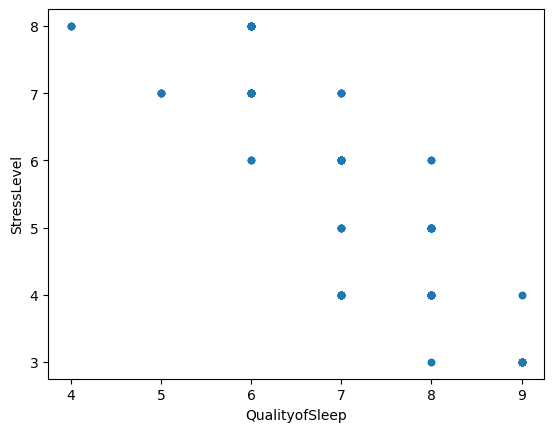

In [33]:
df.plot(kind = 'scatter', x = 'QualityofSleep', y = 'StressLevel')
plt.show()

In [ ]:
#How Physical Activity affects Quality of Sleep was presented on a scatter plot

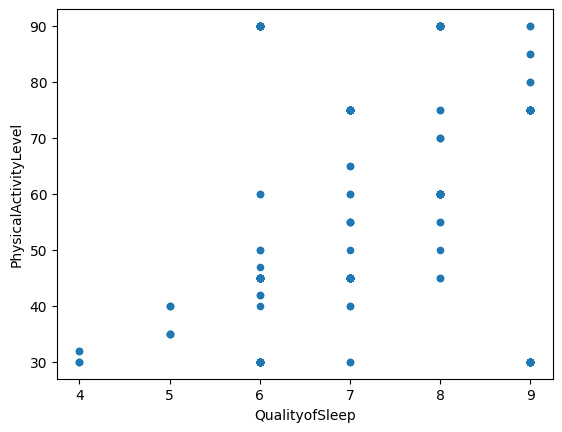

In [43]:
df.plot(kind = 'scatter', x = 'QualityofSleep', y = 'PhysicalActivityLevel')
plt.show()

In [ ]:
#Top 3 stressful Occupations

In [67]:
avgStressByOccupation = df.groupby('Occupation')['StressLevel'].mean().reset_index()
sortedAvgStressByOccupation = avgStressByOccupation.sort_values(by='StressLevel', ascending=False)
topStressfulOccupations = sortedAvgStressByOccupation.head(3)
print(topStressfulOccupations)

             Occupation  StressLevel
6  Sales Representative          8.0
7           Salesperson          7.0
8             Scientist          7.0


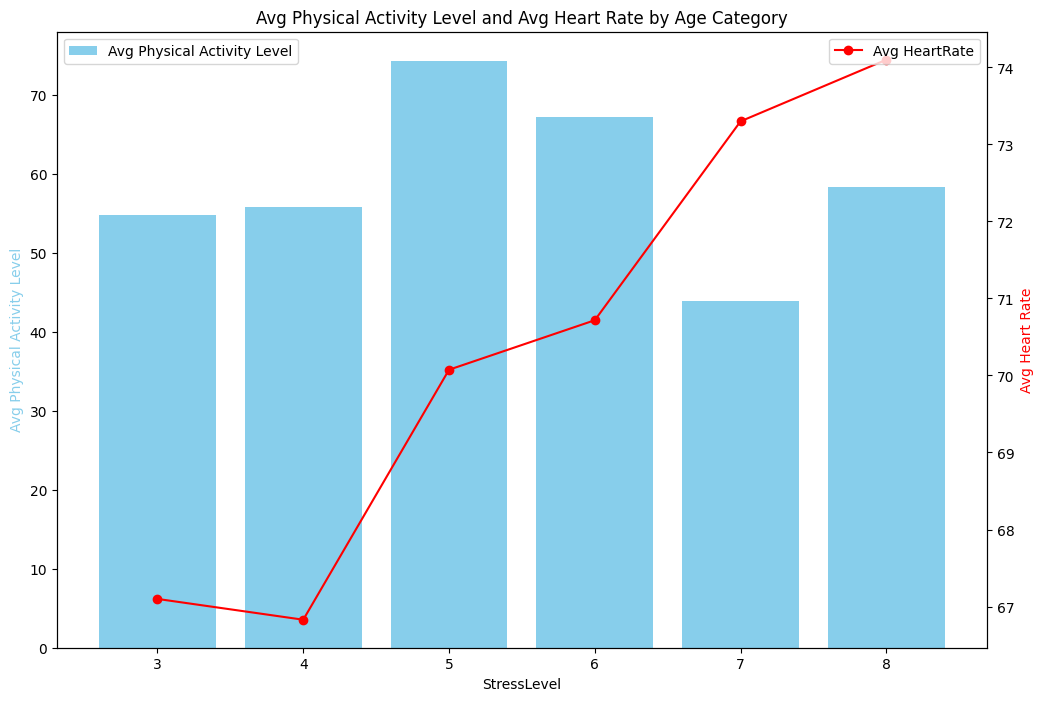

In [90]:
grouped_df = df.groupby('StressLevel').agg({
    'PhysicalActivityLevel': 'mean',
    'HeartRate': 'mean'
}).reset_index()

grouped_df.columns = ['StressLevel', 'AvgPhysicalActivityLevel', 'AvgHeartRate']


fig, ax1 = plt.subplots(figsize=(12, 8))
,
ax1.bar(grouped_df['StressLevel'], grouped_df['AvgPhysicalActivityLevel'], color='skyblue', label='Avg Physical Activity Level')

ax2 = ax1.twinx()
ax2.plot(grouped_df['StressLevel'], grouped_df['AvgHeartRate'], color='r', marker='o', label='Avg HeartRate')

ax1.set_xlabel('StressLevel')
ax1.set_ylabel('Avg Physical Activity Level', color='skyblue')
ax2.set_ylabel('Avg Heart Rate', color='r')
ax1.set_title('Avg Physical Activity Level and Avg Heart Rate by Age Category')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

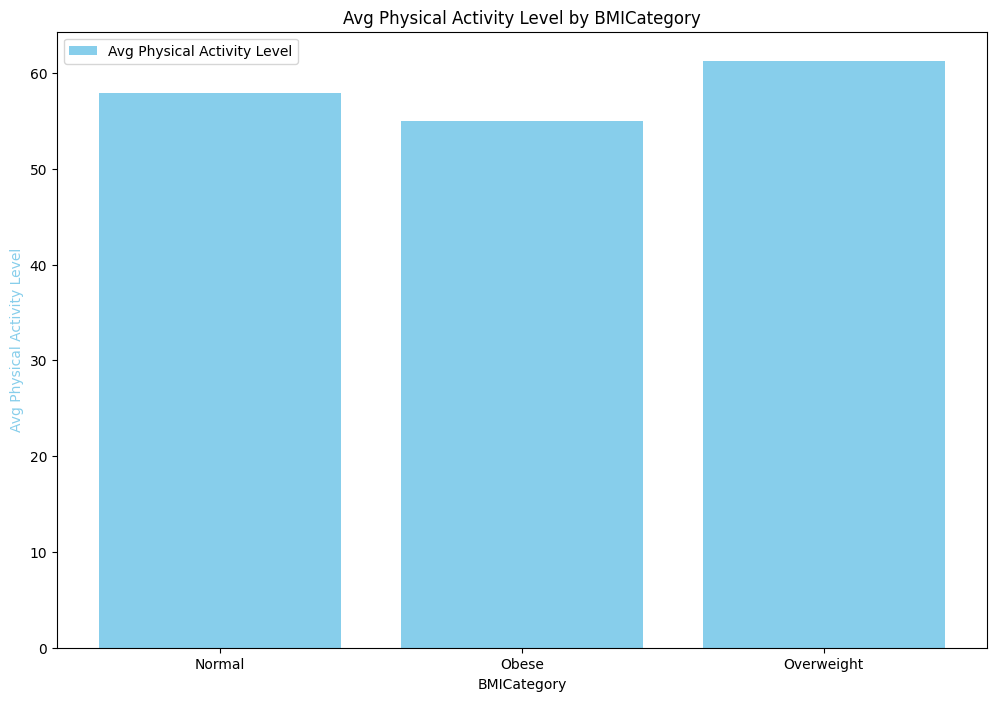

In [94]:
grouped_df = df.groupby('BMICategory').agg({
    'PhysicalActivityLevel': 'mean'
}).reset_index()

grouped_df.columns = ['BMICategory', 'AvgPhysicalActivityLevel']

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(grouped_df['BMICategory'], grouped_df['AvgPhysicalActivityLevel'], color='skyblue', label='Avg Physical Activity Level')

ax1.set_xlabel('BMICategory')
ax1.set_ylabel('Avg Physical Activity Level', color='skyblue')
ax1.set_title('Avg Physical Activity Level by BMICategory')

plt.legend()
plt.show()